In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import seaborn as sns
import plotly.express as px

df = pd.read_csv('./data/musicdata_cleaned.csv')
features = ['BPM', 'Energy', 'Dance', 'Loud', 'Valence',  'Acoustic', 'Pop.']
df = df.dropna(subset=features)
X = df[features].copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA: Principal Component Analysis

Reduce high-dimensional data into 2D and visualize clusters.

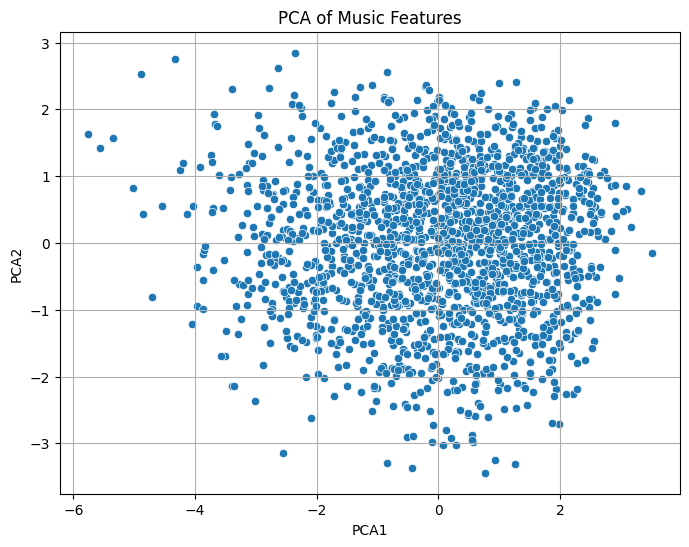

In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', data=df)
plt.title('PCA of Music Features')
plt.grid(True)
plt.show()

## UMAP: Uniform Manifold Approximation and Projection

c:\Users\User\Desktop\ml\pandas\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


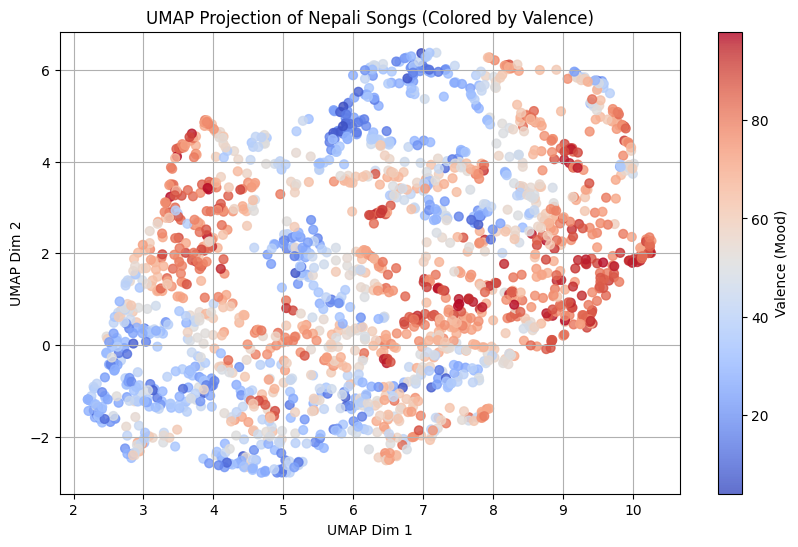

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("./data/musicdata_cleaned.csv")

# Select audio feature columns
features = ['BPM', 'Energy', 'Dance', 'Loud', 'Valence', 'Acoustic', 'Pop.']
X = df[features].dropna()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Add to dataframe
df_umap = df.loc[X.index].copy()
df_umap['UMAP1'] = embedding[:, 0]
df_umap['UMAP2'] = embedding[:, 1]

# Plot (colored by Valence/mood)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'],
                      c=df_umap['Valence'], cmap='coolwarm', s=40, alpha=0.8)
plt.colorbar(scatter, label='Valence (Mood)')
plt.title('UMAP Projection of Nepali Songs (Colored by Valence)')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid(True)
plt.show()


## K-Means Clustering

Assign songs to k clusters using K-Means.

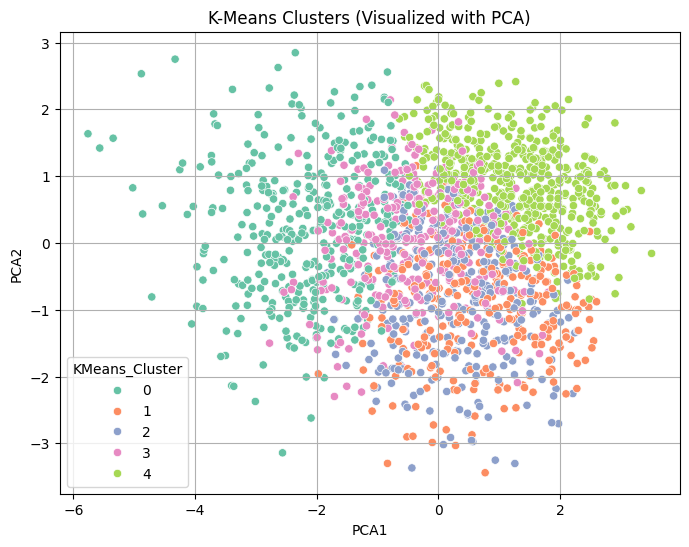

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2', data=df)
plt.title('K-Means Clusters (Visualized with PCA)')
plt.grid(True)
plt.show()

## DBSCAN Clustering

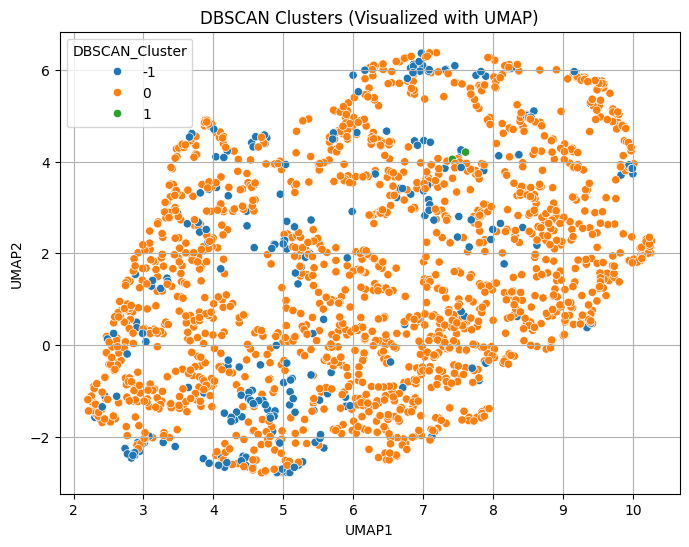

In [7]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='DBSCAN_Cluster', palette='tab10', data=df)
plt.title('DBSCAN Clusters (Visualized with UMAP)')
plt.grid(True)
plt.show()

## Hierarchical Clustering (Agglomerative)

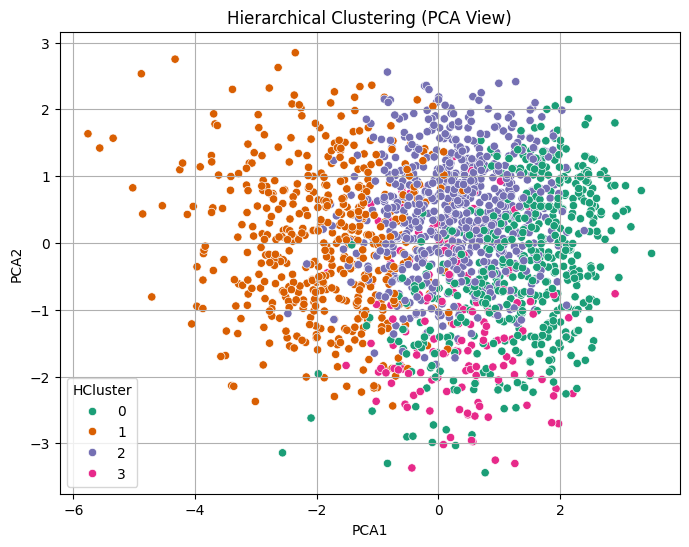

In [8]:
hc = AgglomerativeClustering(n_clusters=4)
df['HCluster'] = hc.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='HCluster', palette='Dark2', data=df)
plt.title('Hierarchical Clustering (PCA View)')
plt.grid(True)
plt.show()